# Contents

- Importing df_instacart

- Creating region map for NORTH SOUTH etc and adding to df_instacart

- Counting high/low spenders in each region

- Removing low spenders and repeating analysis (no dif)

- Creating activity flag for low activity/ high activity, adding to df_instacart

- importing and incorporating departments.csv into df_instacart

- Creating Age, income, dependents buckets for creating customer profiles

- Creating customer profiles based on age, income, dependents, department activity as per instruction, updting df_instacart with profiles

- Export df_instacart as pkl as savepoint

- Visualizing customer profiles via bar chart, export as png

- Aggregating max, mean, min variable for profiles - export excel

- Analysing profile with regions, department orders bar graph export as png

- Analysing profiles with unique customer ids to count customers instead of orders with regions, top_departments, export as png

- Analysing Loyalty status, export bar graph as png


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#path shortcut
path = r"C:\Users\ryani\Desktop\Data Analyst COURSE\Data Immersion\06-2025 E4 INSTACART Py"

In [3]:
#show all columns
pd.set_option('display.max_columns', None)

In [4]:
#import dataframe data
df_instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_all_E4.9.pkl'))
df_instacart

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_indicator,price-range-loc,Busiest day,Busiest days,busiest_period_of_day.,max_order,loyalty_flag,mean_spent,spender_flag,median_days_s_p_o,buyer_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,merged_customer
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0,both,Mid-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,both,Original Beef Jerky,23,19,4.4,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,both,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404525,2977660,206209,13,1,12,7.0,False,14197,5,1,both,Tomato Paste,9,9,5.6,both,Mid-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both
32404526,2977660,206209,13,1,12,7.0,False,38730,6,0,both,Brownie Crunch High Protein Bar,3,19,5.9,both,Mid-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both
32404527,2977660,206209,13,1,12,7.0,False,31477,7,0,both,High Protein Bar Chunky Peanut Butter,3,19,4.2,both,Low-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both
32404528,2977660,206209,13,1,12,7.0,False,6567,8,0,both,Chocolate Peanut Butter Protein Bar,3,19,4.9,both,Low-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both


In [5]:
#Dataframe info
df_instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404530 entries, 0 to 32404529
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   new_customer            bool    
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  _merge                  category
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  merge_indicator         category
 16  price-range-loc         object  
 17  Busiest day             object  
 18  Busiest days            object  
 19  busiest_period_of_day.  object  
 20  max_order               int64   
 21  loyalt

# Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The identifying information for each individual person has been removed (First Name, Surname). There is no personally identifying information in the dataframe.

In [6]:
#Creating a region map for the regions
region_map = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast',

    # Midwest
    'Ohio': 'Midwest', 'Indiana': 'Midwest', 'Illinois': 'Midwest',
    'Michigan': 'Midwest', 'Wisconsin': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',

    # South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South', 'Alabama': 'South',
    'Texas': 'South', 'Oklahoma': 'South', 'Arkansas': 'South', 'Louisiana': 'South',

    # West
    'Montana': 'West', 'Idaho': 'West', 'Wyoming': 'West', 'Colorado': 'West',
    'New Mexico': 'West', 'Arizona': 'West', 'Utah': 'West', 'Nevada': 'West',
    'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Alaska': 'West', 'Hawaii': 'West'}

In [7]:
#Adding the region column to the dataframe
df_instacart['REGION'] = df_instacart['STATE'].map(region_map)

In [8]:
df_instacart

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_indicator,price-range-loc,Busiest day,Busiest days,busiest_period_of_day.,max_order,loyalty_flag,mean_spent,spender_flag,median_days_s_p_o,buyer_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,merged_customer,REGION
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0,both,Mid-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,both,Original Beef Jerky,23,19,4.4,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,both,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404525,2977660,206209,13,1,12,7.0,False,14197,5,1,both,Tomato Paste,9,9,5.6,both,Mid-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest
32404526,2977660,206209,13,1,12,7.0,False,38730,6,0,both,Brownie Crunch High Protein Bar,3,19,5.9,both,Mid-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest
32404527,2977660,206209,13,1,12,7.0,False,31477,7,0,both,High Protein Bar Chunky Peanut Butter,3,19,4.2,both,Low-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest
32404528,2977660,206209,13,1,12,7.0,False,6567,8,0,both,Chocolate Peanut Butter Protein Bar,3,19,4.9,both,Low-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest


# The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
# Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
# Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [9]:
#Create a df with the needed columns
df_1 = df_instacart[['spender_flag', 'REGION', 'buyer_flag', 'user_id']]
df_1

,spender_flag,REGION,buyer_flag,user_id
0,Low spender,South,Non-frequent customer,1
1,Low spender,South,Non-frequent customer,1
2,Low spender,South,Non-frequent customer,1
3,Low spender,South,Non-frequent customer,1
4,Low spender,South,Non-frequent customer,1
...,...,...,...,...
32404525,Low spender,Midwest,Non-frequent customer,206209
32404526,Low spender,Midwest,Non-frequent customer,206209
32404527,Low spender,Midwest,Non-frequent customer,206209
32404528,Low spender,Midwest,Non-frequent customer,206209


In [10]:
#Create Table for High-Low spender acording to region. Rename spender_flag and COUNT
df_1_group = (df_1.groupby('REGION').value_counts(['spender_flag']).reset_index(name='COUNT').rename(columns={'spender_flag': 'High/Low Spender'}))
df_1_group

,REGION,High/Low Spender,COUNT
0,Midwest,Low spender,7568060
1,Midwest,High spender,29265
2,Northeast,Low spender,5703765
3,Northeast,High spender,18642
4,South,Low spender,10751321
5,South,High spender,40564
6,West,Low spender,8261690
7,West,High spender,31223


In [11]:
#Re-order high-low - exported to Excel
df_1_group_sorted = df_1_group.sort_values(by='COUNT', ascending=False).reset_index(drop=True)
df_1_group_sorted

,REGION,High/Low Spender,COUNT
0,South,Low spender,10751321
1,West,Low spender,8261690
2,Midwest,Low spender,7568060
3,Northeast,Low spender,5703765
4,South,High spender,40564
5,West,High spender,31223
6,Midwest,High spender,29265
7,Northeast,High spender,18642


While the South and West generate more orders that the Midwest and the Northeast, there is no concentration of 'High-spending' customers, with the general number of high spenders increasing with total numers of customers as well as the low spenders.

# The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [12]:
df_instacart.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_spent,median_days_s_p_o,Age,n_dependants,income
count,3.240453e+07,3.240453e+07,3.240453e+07,3.240453e+07,3.240453e+07,3.032844e+07,3.240453e+07,3.240453e+07,3.240453e+07,3.240453e+07,3.240453e+07,3.240453e+07,3.240453e+07,3.240453e+07,3.240452e+07,3.240453e+07,3.240453e+07,3.240453e+07
mean,1.710746e+06,1.029372e+05,1.714231e+01,2.738871e+00,1.342514e+01,1.110412e+01,2.559866e+04,8.352559e+00,5.895857e-01,7.119613e+01,9.919794e+00,7.789991e+00,3.305216e+01,7.789991e+00,1.039780e+01,4.946535e+01,1.501903e+00,9.943818e+04
std,9.872993e+05,5.946643e+04,1.753538e+01,2.090076e+00,4.246379e+00,8.779086e+00,1.408401e+04,7.127089e+00,4.919089e-01,3.821138e+01,6.281487e+00,4.242234e+00,2.515537e+01,7.348090e-01,7.131776e+00,1.848566e+01,1.118871e+00,4.305726e+04
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.900000e-01,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559480e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.377551e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.026170e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.811015e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565505e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.228517e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [13]:
cust_summary = (df_instacart.groupby('user_id', as_index=False).agg(max_order=('order_number','max')))
cust_summary

,user_id,max_order
0,1,16
1,2,14
2,3,12
3,4,5
4,5,4
...,...,...
206202,206205,3
206203,206206,67
206204,206207,16
206205,206208,49


In [14]:
#Activity flag
cust_summary['activity_flag'] = np.where(cust_summary['max_order'] < 5,'Low Activity','High Activity')

In [15]:
#Re-merge with original df_instacart
df_instacart = df_instacart.merge(cust_summary[['user_id','activity_flag']], on='user_id', how='left')
df_instacart

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_indicator,price-range-loc,Busiest day,Busiest days,busiest_period_of_day.,max_order,loyalty_flag,mean_spent,spender_flag,median_days_s_p_o,buyer_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,merged_customer,REGION,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0,both,Mid-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity
1,2539329,1,1,2,8,NaN,True,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity
2,2539329,1,1,2,8,NaN,True,12427,3,0,both,Original Beef Jerky,23,19,4.4,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity
3,2539329,1,1,2,8,NaN,True,26088,4,0,both,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity
4,2539329,1,1,2,8,NaN,True,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404525,2977660,206209,13,1,12,7.0,False,14197,5,1,both,Tomato Paste,9,9,5.6,both,Mid-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,High Activity
32404526,2977660,206209,13,1,12,7.0,False,38730,6,0,both,Brownie Crunch High Protein Bar,3,19,5.9,both,Mid-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,High Activity
32404527,2977660,206209,13,1,12,7.0,False,31477,7,0,both,High Protein Bar Chunky Peanut Butter,3,19,4.2,both,Low-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,High Activity
32404528,2977660,206209,13,1,12,7.0,False,6567,8,0,both,Chocolate Peanut Butter Protein Bar,3,19,4.9,both,Low-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,High Activity


In [16]:
#Check new flag numbers
df_instacart.value_counts(['activity_flag'])

activity_flag
High Activity    30964235
Low Activity      1440295
Name: count, dtype: int64

In [17]:
#Re-do the spending habit df
#Create a df with the needed columns
df_2 = df_instacart[['spender_flag', 'REGION', 'buyer_flag', 'user_id', 'activity_flag']]
df_2

,spender_flag,REGION,buyer_flag,user_id,activity_flag
0,Low spender,South,Non-frequent customer,1,High Activity
1,Low spender,South,Non-frequent customer,1,High Activity
2,Low spender,South,Non-frequent customer,1,High Activity
3,Low spender,South,Non-frequent customer,1,High Activity
4,Low spender,South,Non-frequent customer,1,High Activity
...,...,...,...,...,...
32404525,Low spender,Midwest,Non-frequent customer,206209,High Activity
32404526,Low spender,Midwest,Non-frequent customer,206209,High Activity
32404527,Low spender,Midwest,Non-frequent customer,206209,High Activity
32404528,Low spender,Midwest,Non-frequent customer,206209,High Activity


In [18]:
#Drop the Low-activity
df_2 = df_2[df_2['activity_flag'] != 'Low Activity'].reset_index(drop=True)

In [19]:
df_2.value_counts('activity_flag')

activity_flag
High Activity    30964235
Name: count, dtype: int64

In [20]:
#Create Table for High-Low spender acording to region. Rename spender_flag and COUNT
df_2_group = (df_2.groupby('REGION').value_counts(['spender_flag']).reset_index(name='COUNT').rename(columns={'spender_flag': 'High/Low Spender'}))
df_2_group

,REGION,High/Low Spender,COUNT
0,Midwest,Low spender,7237428
1,Midwest,High spender,24085
2,Northeast,Low spender,5449298
3,Northeast,High spender,15058
4,South,Low spender,10277893
5,South,High spender,33246
6,West,Low spender,7902188
7,West,High spender,25039


In [21]:
#Re-order high-low - exported to Excel
df_2_group_sorted = df_1_group.sort_values(by='COUNT', ascending=False).reset_index(drop=True)
df_2_group_sorted

,REGION,High/Low Spender,COUNT
0,South,Low spender,10751321
1,West,Low spender,8261690
2,Midwest,Low spender,7568060
3,Northeast,Low spender,5703765
4,South,High spender,40564
5,West,High spender,31223
6,Midwest,High spender,29265
7,Northeast,High spender,18642


In [22]:
#Export to Excel
df_2_group_sorted.to_clipboard()

# The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [23]:
df_departments = pd.read_csv (os.path.join (path, '02 Data', 'Original Data', 'departments.csv'))
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [24]:
df_instacart = df_instacart.merge(df_departments,  on = ['department_id'])
df_instacart

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_indicator,price-range-loc,Busiest day,Busiest days,busiest_period_of_day.,max_order,loyalty_flag,mean_spent,spender_flag,median_days_s_p_o,buyer_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,merged_customer,REGION,activity_flag,department
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0,both,Mid-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,beverages
1,2539329,1,1,2,8,NaN,True,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,dairy eggs
2,2539329,1,1,2,8,NaN,True,12427,3,0,both,Original Beef Jerky,23,19,4.4,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,snacks
3,2539329,1,1,2,8,NaN,True,26088,4,0,both,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,snacks
4,2539329,1,1,2,8,NaN,True,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,household
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404525,2977660,206209,13,1,12,7.0,False,14197,5,1,both,Tomato Paste,9,9,5.6,both,Mid-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,High Activity,dry goods pasta
32404526,2977660,206209,13,1,12,7.0,False,38730,6,0,both,Brownie Crunch High Protein Bar,3,19,5.9,both,Mid-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,High Activity,snacks
32404527,2977660,206209,13,1,12,7.0,False,31477,7,0,both,High Protein Bar Chunky Peanut Butter,3,19,4.2,both,Low-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,High Activity,snacks
32404528,2977660,206209,13,1,12,7.0,False,6567,8,0,both,Chocolate Peanut Butter Protein Bar,3,19,4.9,both,Low-range product,Busiest days,Busiest days,Most Orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,High Activity,snacks


In [25]:
# Rearrange columns to place 'department' next to 'department_id'
# First, get all column names
cols = df_instacart.columns.tolist()

# Find the position of 'department_id'
dept_id_pos = cols.index('department_id')

# Remove 'department' from its current position
cols.remove('department')

# Insert 'department' after 'department_id'
cols.insert(dept_id_pos + 1, 'department')

# Reorder the DataFrame
df_instacart = df_instacart[cols]

In [26]:
df_instacart.head().to_clipboard()

In [27]:
df_instacart.value_counts('department')

department
produce            9479162
dairy eggs         5398672
snacks             2887521
beverages          2688116
frozen             2234734
pantry             1875366
bakery             1172421
canned goods       1068058
deli               1051244
dry goods pasta     866590
household           738663
meat seafood        708913
breakfast           703028
personal care       447572
babies              423798
international       269252
alcohol             153696
pets                 97716
missing              69144
other                36291
bulk                 34573
Name: count, dtype: int64

In [28]:
# 1.1 Age buckets
age_bins   = [0, 25, 40, 60, 120]
age_labels = ['Under 25', '25-40', '41-60', 'Over 60']

# 1.2 Income bands
income_thresh = 50000

# 1.3 Dependents buckets
dep_bins   = [-1, 0, 2, 99]
dep_labels = ['No Dependents', 'Few Dependents', 'Many Dependents']


In [29]:
# 2.1 Age group
df_instacart['age_group'] = pd.cut(
    df_instacart['Age'],
    bins=age_bins,
    labels=age_labels
)

# 2.2 Income band
df_instacart['income_band'] = np.where(
    df_instacart['income'] <= income_thresh,
    'Low Income',
    'High Income'
)

# 2.3 Dependents group
df_instacart['dep_group'] = pd.cut(
    df_instacart['n_dependants'],
    bins=dep_bins,
    labels=dep_labels
)

# 2.4 Top department per user_id (most frequent)
df_instacart['top_department'] = (
    df_instacart
    .groupby('user_id')['department']
    .transform(lambda x: x.mode().iat[0])
)


C:\Users\ryani\AppData\Local\Temp\ipykernel_19472\738653762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instacart['age_group'] = pd.cut(
C:\Users\ryani\AppData\Local\Temp\ipykernel_19472\738653762.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instacart['income_band'] = np.where(
C:\Users\ryani\AppData\Local\Temp\ipykernel_19472\738653762.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [30]:
def assign_profile(row):
    age, inc, dep, dept = (
        row['age_group'],
        row['income_band'],
        row['dep_group'],
        row['top_department']
    )
    
    # 3.1 Parents
    if dep != 'No Dependents':
        parent_type = 'Young Parent' if age in ['Under 25', '25-40'] else 'Experienced Parent'
        return f"{inc} {parent_type}"
    
    # 3.2 No dependents: based on favorite department
    if dept == 'pets':
        return 'Pet Owner'
    if dept == 'alcohol':
        return 'Social Single'
    
    # 3.3 Default
    return 'Single Adult'


In [31]:
# 4.1 Add customer_profile
df_instacart['customer_profile'] = df_instacart.apply(assign_profile, axis=1)

# 4.2 Quick sanity check
print(
    df_instacart[
        ['user_id','age_group','income_band','dep_group','top_department','customer_profile']
    ]
    .drop_duplicates('user_id')
    .head()
)


C:\Users\ryani\AppData\Local\Temp\ipykernel_19472\1484069944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instacart['customer_profile'] = df_instacart.apply(assign_profile, axis=1)


     user_id age_group  income_band        dep_group top_department  \
0          1     25-40   Low Income  Many Dependents     dairy eggs   
59         2   Over 60  High Income  Many Dependents     dairy eggs   
254        3     25-40  High Income  Many Dependents        produce   
342        4     25-40   Low Income  Many Dependents      beverages   
360        5   Over 60  High Income    No Dependents        produce   

                   customer_profile  
0           Low Income Young Parent  
59   High Income Experienced Parent  
254        High Income Young Parent  
342         Low Income Young Parent  
360                    Single Adult  


In [32]:
df_instacart.value_counts('customer_profile')

customer_profile
High Income Experienced Parent    14212744
Single Adult                       8036657
High Income Young Parent           7404154
Low Income Young Parent            1358995
Low Income Experienced Parent      1331134
Social Single                        45072
Pet Owner                            15774
Name: count, dtype: int64

In [33]:
df_instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,department,prices,merge_indicator,price-range-loc,Busiest day,Busiest days,busiest_period_of_day.,max_order,loyalty_flag,mean_spent,spender_flag,median_days_s_p_o,buyer_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,merged_customer,REGION,activity_flag,age_group,income_band,dep_group,top_department,customer_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,beverages,9.0,both,Mid-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,25-40,Low Income,Many Dependents,dairy eggs,Low Income Young Parent
1,2539329,1,1,2,8,NaN,True,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91,16,dairy eggs,12.5,both,Mid-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,25-40,Low Income,Many Dependents,dairy eggs,Low Income Young Parent
2,2539329,1,1,2,8,NaN,True,12427,3,0,both,Original Beef Jerky,23,19,snacks,4.4,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,25-40,Low Income,Many Dependents,dairy eggs,Low Income Young Parent
3,2539329,1,1,2,8,NaN,True,26088,4,0,both,Aged White Cheddar Popcorn,23,19,snacks,4.7,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,25-40,Low Income,Many Dependents,dairy eggs,Low Income Young Parent
4,2539329,1,1,2,8,NaN,True,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54,17,household,1.0,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,25-40,Low Income,Many Dependents,dairy eggs,Low Income Young Parent


In [34]:
df_instacart.shape

(32404530, 42)

In [35]:
df_instacart.value_counts('dep_group')

dep_group
Few Dependents     16171879
Many Dependents     8135148
No Dependents       8097503
Name: count, dtype: int64

In [36]:
df_instacart.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_merged_profiles.pkl'))

# Create an appropriate visualization to show the distribution of profiles.

Text(0.5, 1.0, 'Instacart Customer Profiles')

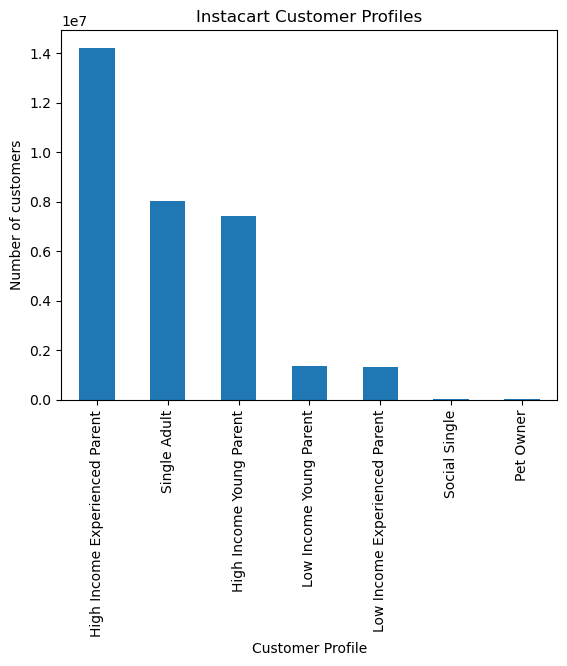

In [37]:
bar_profile = df_instacart.value_counts('customer_profile').plot.bar()
plt.xlabel('Customer Profile')
plt.ylabel('Number of customers')
plt.title('Instacart Customer Profiles')
plt.tight_layout()

In [94]:
bar_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_customer_profiles.png'), 
                         bbox_inches='tight')

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [39]:
hiep_df = df_instacart[df_instacart['customer_profile'] == 'High Income Experienced Parent']
hiep_df.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_spent,median_days_s_p_o,Age,n_dependants,income
count,1.421274e+07,1.421274e+07,1.421274e+07,1.421274e+07,1.421274e+07,1.331266e+07,1.421274e+07,1.421274e+07,1.421274e+07,1.421274e+07,1.421274e+07,1.421274e+07,1.421274e+07,1.421274e+07,1.421274e+07,1.421274e+07,1.421274e+07,1.421274e+07
mean,1.710157e+06,1.028585e+05,1.715618e+01,2.744560e+00,1.344909e+01,1.108452e+01,2.562988e+04,8.444249e+00,5.864337e-01,7.134240e+01,9.840005e+00,7.913234e+00,3.307234e+01,7.913234e+00,1.035832e+01,6.097476e+01,2.003196e+00,1.226927e+05
std,9.873496e+05,5.929897e+04,1.748481e+01,2.101242e+00,4.247034e+00,8.772654e+00,1.407515e+04,7.128795e+00,4.924726e-01,3.814226e+01,6.251284e+00,4.256161e+00,2.503077e+01,6.294461e-01,7.101203e+00,1.186039e+01,8.168158e-01,3.727220e+04
min,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.900000e-01,1.000000e+00,1.100000e+00,0.000000e+00,4.100000e+01,1.000000e+00,5.000100e+04
25%,8.546200e+05,5.166700e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.362900e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.400000e+00,1.300000e+01,7.501495e+00,6.000000e+00,5.100000e+01,1.000000e+00,1.008360e+05
50%,1.710708e+06,1.020560e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.536700e+04,7.000000e+00,1.000000e+00,8.300000e+01,8.000000e+00,7.500000e+00,2.600000e+01,7.880605e+00,8.000000e+00,6.100000e+01,2.000000e+00,1.196510e+05
75%,2.564866e+06,1.541620e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.797300e+04,1.200000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.140000e+01,4.700000e+01,8.276989e+00,1.300000e+01,7.100000e+01,3.000000e+00,1.455260e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [40]:
sa_df = df_instacart[df_instacart['customer_profile'] == 'Single Adult']
sa_df.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_spent,median_days_s_p_o,Age,n_dependants,income
count,8.036657e+06,8.036657e+06,8.036657e+06,8.036657e+06,8.036657e+06,7.522656e+06,8.036657e+06,8.036657e+06,8.036657e+06,8.036657e+06,8.036657e+06,8.036657e+06,8.036657e+06,8.036657e+06,8.036657e+06,8.036657e+06,8036657.0,8.036657e+06
mean,1.712206e+06,1.032985e+05,1.725534e+01,2.731463e+00,1.343339e+01,1.108439e+01,2.558962e+04,8.345946e+00,5.908558e-01,7.124100e+01,9.916203e+00,7.788775e+00,3.328198e+01,7.788775e+00,1.037109e+01,4.952341e+01,0.0,9.954977e+04
std,9.869835e+05,5.946846e+04,1.770759e+01,2.088863e+00,4.257261e+00,8.772280e+00,1.408460e+04,7.106822e+00,4.916760e-01,3.824451e+01,6.287266e+00,4.236817e+00,2.540876e+01,7.328251e-01,7.108906e+00,1.844234e+01,0.0,4.292030e+04
min,8.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.900000e-01,2.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.0,2.590300e+04
25%,8.601030e+05,5.202700e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353500e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.379149e+00,6.000000e+00,3.300000e+01,0.0,6.700900e+04
50%,1.712247e+06,1.031660e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.525700e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.810110e+00,8.000000e+00,5.000000e+01,0.0,9.680600e+04
75%,2.566985e+06,1.549960e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794000e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.120000e+01,4.700000e+01,8.222989e+00,1.300000e+01,6.500000e+01,0.0,1.279980e+05
max,3.421080e+06,2.061990e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.370000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.000000e+01,3.000000e+01,8.100000e+01,0.0,5.840970e+05


In [41]:
hiyp_df = df_instacart[df_instacart['customer_profile'] == 'High Income Young Parent']
hiyp_df.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_spent,median_days_s_p_o,Age,n_dependants,income
count,7.404154e+06,7.404154e+06,7.404154e+06,7.404154e+06,7.404154e+06,6.943121e+06,7.404154e+06,7.404154e+06,7.404154e+06,7.404154e+06,7.404154e+06,7.404154e+06,7.404154e+06,7.404154e+06,7.404154e+06,7.404154e+06,7.404154e+06,7.404154e+06
mean,1.711143e+06,1.033686e+05,1.748452e+01,2.731421e+00,1.343284e+01,1.098453e+01,2.563527e+04,8.589085e+00,5.891504e-01,7.141584e+01,9.812590e+00,7.952451e+00,3.375849e+01,7.952451e+00,1.023287e+01,2.898070e+01,1.999343e+00,7.622944e+04
std,9.876064e+05,5.964028e+04,1.772036e+01,2.105540e+00,4.263339e+00,8.712061e+00,1.406843e+04,7.268412e+00,4.919881e-01,3.811493e+01,6.243233e+00,4.254540e+00,2.533783e+01,5.705121e-01,7.014690e+00,6.659684e+00,8.177632e-01,2.270024e+04
min,5.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.900000e-01,3.000000e+00,4.524583e+00,0.000000e+00,1.800000e+01,1.000000e+00,5.000200e+04
25%,8.545552e+05,5.139900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.362900e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.400000e+00,1.400000e+01,7.541332e+00,6.000000e+00,2.300000e+01,1.000000e+00,6.218300e+04
50%,1.712111e+06,1.038630e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.534000e+04,7.000000e+00,1.000000e+00,8.300000e+01,8.000000e+00,7.700000e+00,2.700000e+01,7.888801e+00,8.000000e+00,2.900000e+01,2.000000e+00,7.311600e+04
75%,2.566042e+06,1.548610e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.797100e+04,1.200000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.140000e+01,4.800000e+01,8.282759e+00,1.300000e+01,3.500000e+01,3.000000e+00,8.738400e+04
max,3.421076e+06,2.062060e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.090000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.823333e+01,3.000000e+01,4.000000e+01,3.000000e+00,3.979290e+05


In [42]:
liyp_df = df_instacart[df_instacart['customer_profile'] == 'Low Income Young Parent']
liyp_df.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_spent,median_days_s_p_o,Age,n_dependants,income
count,1.358995e+06,1.358995e+06,1.358995e+06,1.358995e+06,1.358995e+06,1.260381e+06,1.358995e+06,1.358995e+06,1.358995e+06,1.358995e+06,1.358995e+06,1.358995e+06,1.358995e+06,1.358995e+06,1.358995e+06,1.358995e+06,1.358995e+06,1.358995e+06
mean,1.713143e+06,9.951277e+04,1.569094e+01,2.745139e+00,1.330177e+01,1.164196e+01,2.537534e+04,7.560287e+00,5.989544e-01,6.994677e+01,1.058139e+01,6.889138e+00,3.013646e+01,6.889138e+00,1.112818e+01,2.894495e+01,2.009417e+00,3.968270e+04
std,9.872211e+05,5.962300e+04,1.647916e+01,2.011824e+00,4.185341e+00,8.966285e+00,1.414116e+04,6.918078e+00,4.901104e-01,3.858867e+01,6.469747e+00,4.051669e+00,2.396223e+01,8.497329e-01,7.542312e+00,6.583696e+00,8.081208e-01,6.450350e+03
min,4.600000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,1.000000e+00,2.591100e+04
25%,8.602140e+05,4.692700e+04,4.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.317600e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,3.500000e+00,1.100000e+01,6.455294e+00,6.000000e+00,2.300000e+01,1.000000e+00,3.435100e+04
50%,1.712771e+06,9.762200e+04,1.000000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.496400e+04,6.000000e+00,1.000000e+00,7.800000e+01,1.100000e+01,6.300000e+00,2.300000e+01,6.812903e+00,8.000000e+00,2.900000e+01,2.000000e+00,4.108200e+04
75%,2.568255e+06,1.506980e+05,2.200000e+01,5.000000e+00,1.600000e+01,1.600000e+01,3.771000e+04,1.000000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.000000e+01,4.400000e+01,7.187387e+00,1.400000e+01,3.500000e+01,3.000000e+00,4.493000e+04
max,3.421071e+06,2.062040e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.020000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.310000e+01,3.000000e+01,4.000000e+01,3.000000e+00,4.999800e+04


In [43]:
ss_df = df_instacart[df_instacart['customer_profile'] == 'Social Single']
ss_df.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_spent,median_days_s_p_o,Age,n_dependants,income
count,4.507200e+04,45072.000000,45072.000000,45072.000000,45072.000000,42072.000000,45072.000000,45072.000000,45072.000000,45072.000000,45072.000000,45072.000000,45072.000000,45072.000000,45072.000000,45072.000000,45072.0,45072.000000
mean,1.721796e+06,105282.496184,20.007898,3.067204,13.425519,9.748455,25691.206958,5.099663,0.521854,66.810126,8.629127,7.832233,38.610024,7.832233,8.942359,49.069067,0.0,111755.798079
std,9.889474e+05,58833.417140,21.580302,1.892940,3.523069,9.028586,14772.370681,4.511691,0.499528,38.716879,5.640016,4.199490,31.723780,0.885542,7.465983,18.378467,0.0,72919.040435
min,7.700000e+02,505.000000,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.990000,3.000000,3.337500,1.000000,18.000000,0.0,27783.000000
25%,8.681778e+05,49288.000000,5.000000,1.000000,11.000000,3.000000,12914.000000,2.000000,0.000000,28.000000,5.000000,4.400000,12.000000,7.344586,4.000000,33.000000,0.0,70631.000000
50%,1.736091e+06,108287.000000,11.000000,3.000000,13.000000,7.000000,26607.000000,4.000000,1.000000,62.000000,5.000000,7.500000,27.000000,7.814650,6.000000,48.000000,0.0,100947.000000
75%,2.582188e+06,160022.000000,28.000000,5.000000,16.000000,14.000000,38760.000000,7.000000,1.000000,106.000000,14.000000,11.325000,62.000000,8.388262,11.000000,65.000000,0.0,133902.000000
max,3.420883e+06,205953.000000,99.000000,6.000000,23.000000,30.000000,49683.000000,42.000000,1.000000,134.000000,21.000000,25.000000,99.000000,12.885714,30.000000,81.000000,0.0,540828.000000


In [44]:
po_df = df_instacart[df_instacart['customer_profile'] == 'Pet Owner']
po_df.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_spent,median_days_s_p_o,Age,n_dependants,income
count,1.577400e+04,15774.000000,15774.000000,15774.000000,15774.000000,14620.000000,15774.000000,15774.000000,15774.000000,15774.000000,15774.000000,15774.000000,15774.000000,15774.000000,15774.000000,15774.000000,15774.0,15774.000000
mean,1.714431e+06,117403.055788,14.152846,2.987511,13.282237,13.071067,25103.501014,8.515342,0.584316,63.186890,10.175796,7.783720,26.870546,7.783720,12.646158,50.264993,0.0,119795.742424
std,9.960748e+05,60673.775123,13.877315,2.123651,4.195754,9.479956,14359.329672,6.977433,0.492855,33.877161,5.531198,4.163846,19.527581,0.599726,8.174753,18.529564,0.0,84559.785773
min,3.543000e+03,1534.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,5.710000,2.000000,19.000000,0.0,27634.000000
25%,8.746140e+05,51726.000000,4.000000,1.000000,10.000000,5.000000,12708.000000,3.000000,0.000000,41.000000,7.000000,4.400000,10.000000,7.395243,6.000000,32.000000,0.0,65264.000000
50%,1.671878e+06,143361.000000,9.000000,3.000000,13.000000,10.000000,25869.000000,7.000000,1.000000,45.000000,8.000000,7.400000,20.000000,7.936275,10.000000,50.000000,0.0,101961.000000
75%,2.588150e+06,165129.000000,20.000000,5.000000,16.000000,20.000000,37144.750000,12.000000,1.000000,91.000000,16.000000,11.300000,40.000000,8.109600,17.000000,68.000000,0.0,134018.000000
max,3.416606e+06,205975.000000,63.000000,6.000000,23.000000,30.000000,49688.000000,56.000000,1.000000,134.000000,21.000000,25.000000,63.000000,10.539394,30.000000,81.000000,0.0,403681.000000


In [45]:
hiep_df.describe().to_clipboard()

In [46]:
sa_df.describe().to_clipboard()

In [47]:
hiyp_df.describe().to_clipboard()

In [48]:
liyp_df.describe().to_clipboard()

In [49]:
ss_df.describe().to_clipboard()

In [50]:
po_df.describe().to_clipboard()

Above all saved in ('04 Analysis' 'Excel' 'Customer_profile_stats')

# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [51]:
df_5 = df_instacart[['user_id', 'department', 'prices', 'REGION', 'customer_profile', 'income_band', 'dep_group', 'age_group', 'top_department']]

In [52]:
df_5

,user_id,department,prices,REGION,customer_profile,income_band,dep_group,age_group,top_department
0,1,beverages,9.0,South,Low Income Young Parent,Low Income,Many Dependents,25-40,dairy eggs
1,1,dairy eggs,12.5,South,Low Income Young Parent,Low Income,Many Dependents,25-40,dairy eggs
2,1,snacks,4.4,South,Low Income Young Parent,Low Income,Many Dependents,25-40,dairy eggs
3,1,snacks,4.7,South,Low Income Young Parent,Low Income,Many Dependents,25-40,dairy eggs
4,1,household,1.0,South,Low Income Young Parent,Low Income,Many Dependents,25-40,dairy eggs
...,...,...,...,...,...,...,...,...,...
32404525,206209,dry goods pasta,5.6,Midwest,High Income Experienced Parent,High Income,Many Dependents,Over 60,dairy eggs
32404526,206209,snacks,5.9,Midwest,High Income Experienced Parent,High Income,Many Dependents,Over 60,dairy eggs
32404527,206209,snacks,4.2,Midwest,High Income Experienced Parent,High Income,Many Dependents,Over 60,dairy eggs
32404528,206209,snacks,4.9,Midwest,High Income Experienced Parent,High Income,Many Dependents,Over 60,dairy eggs


In [53]:
df_5_uniq_user = df_5.drop_duplicates(subset='user_id', keep='first').reset_index(drop=True)
df_5_uniq_user


,user_id,department,prices,REGION,customer_profile,income_band,dep_group,age_group,top_department
0,1,beverages,9.0,South,Low Income Young Parent,Low Income,Many Dependents,25-40,dairy eggs
1,2,snacks,5.2,West,High Income Experienced Parent,High Income,Many Dependents,Over 60,dairy eggs
2,3,produce,8.8,West,High Income Young Parent,High Income,Many Dependents,25-40,produce
3,4,bakery,9.4,South,Low Income Young Parent,Low Income,Many Dependents,25-40,beverages
4,5,pantry,10.7,West,Single Adult,High Income,No Dependents,Over 60,produce
...,...,...,...,...,...,...,...,...,...
206202,206205,dairy eggs,12.8,West,High Income Young Parent,High Income,Few Dependents,25-40,dairy eggs
206203,206206,frozen,10.8,West,High Income Young Parent,High Income,Few Dependents,Under 25,frozen
206204,206207,produce,6.3,Midwest,High Income Experienced Parent,High Income,Few Dependents,Over 60,dairy eggs
206205,206208,bakery,12.7,Midwest,High Income Experienced Parent,High Income,Few Dependents,Over 60,produce


In [54]:
df_5_uniq_user.to_clipboard()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

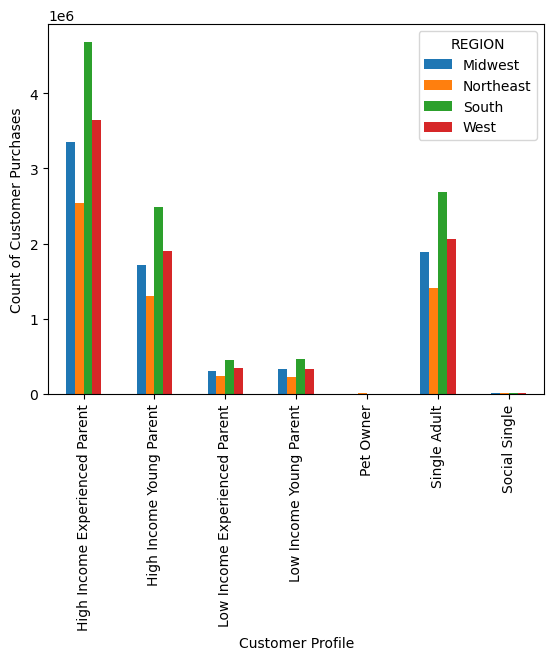

In [55]:
bar_reg_prof = df_5.groupby(['customer_profile', 'REGION']).size().unstack().plot.bar()
plt.xlabel('Customer Profile')
plt.ylabel('Count of Customer Purchases')
plt.tight_layout

In [93]:
bar_reg_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Profiles_regions_bar.png'), 
                         bbox_inches='tight')

Text(0, 0.5, 'Count of Customers')

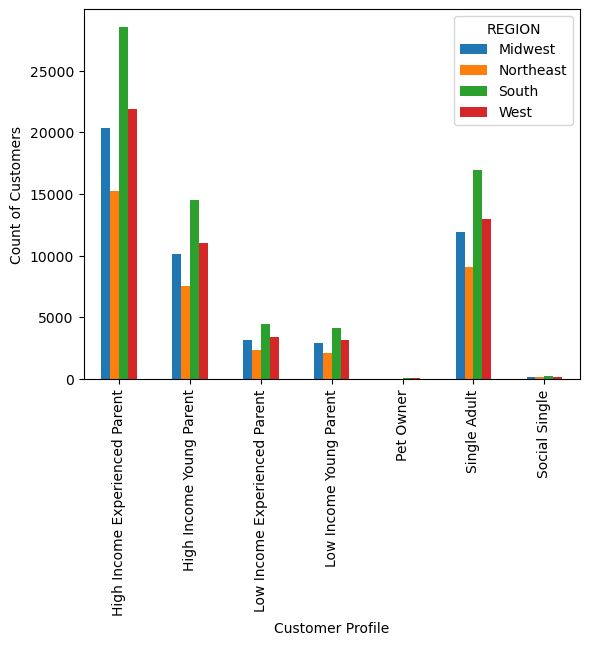

In [57]:
df_5_uniq_user.groupby(['customer_profile', 'REGION']).size().unstack().plot.bar()
plt.xlabel('Customer Profile')
plt.ylabel('Count of Customers')

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

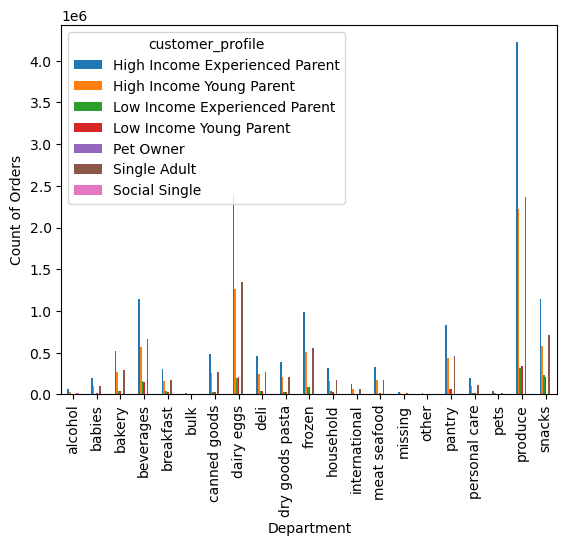

In [58]:
bar_dept_prof = df_5.groupby(['department', 'customer_profile']).size().unstack().plot.bar()
plt.xlabel('Department')
plt.ylabel('Count of Orders')
plt.tight_layout

In [92]:
bar_dept_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Prof_dept_bar_all.png'), 
                         bbox_inches='tight')

In [60]:
keep_depts = [ 'beverages','canned goods', 'dairy eggs', 'frozen', 'pantry', 'produce', 'snacks', 'alcohol', 'babies']

df_5_filt = df_5[df_5['department'].isin(keep_depts)]


In [61]:
keep_key_depts = ['dairy eggs', 'produce', 'snacks']

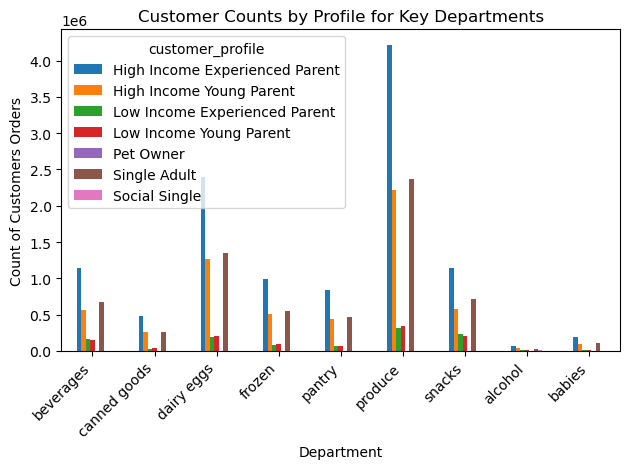

In [62]:
df_5_filt.groupby(['department', 'customer_profile']) \
      .size() \
      .unstack(fill_value=0) \
      .reindex(keep_depts) \
      .plot(kind='bar')

plt.xlabel('Department')
plt.ylabel('Count of Customers Orders')
plt.title('Customer Counts by Profile for Key Departments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 2400x1200 with 0 Axes>

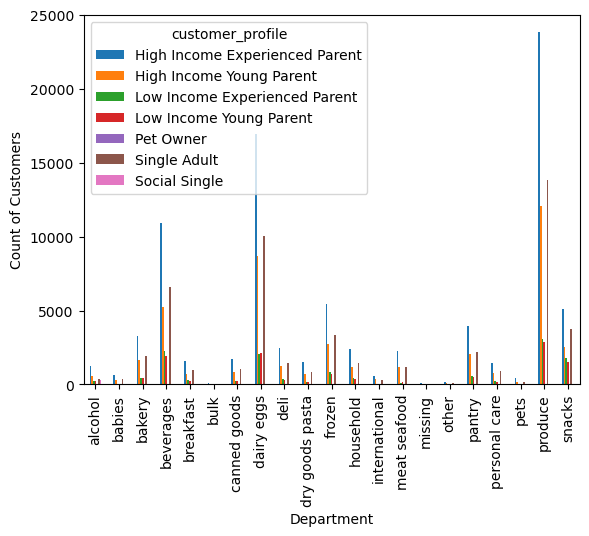

<Figure size 2400x1200 with 0 Axes>

In [63]:
df_5_uniq_user.groupby(['department', 'customer_profile']).size().unstack().plot.bar()
plt.xlabel('Department')
plt.ylabel('Count of Customers')
plt.figure(figsize=(24, 12))

C:\Users\ryani\AppData\Local\Temp\ipykernel_19472\1803196344.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_5_filt_uniq = df_5_uniq_user[df_5['department'].isin(keep_depts)]


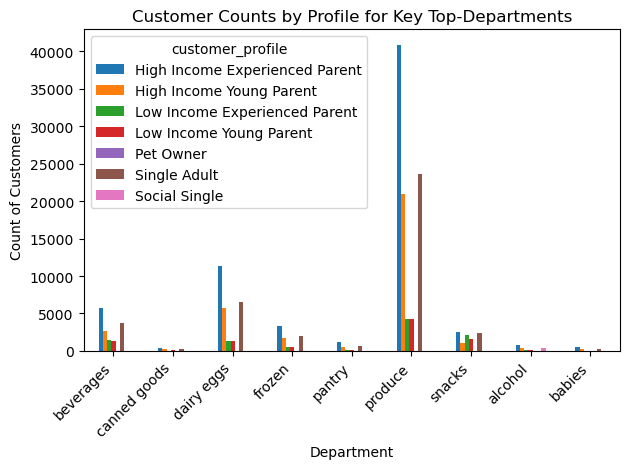

In [64]:
#Reduce products for clarity
df_5_filt_uniq = df_5_uniq_user[df_5['department'].isin(keep_depts)]
df_5_filt_uniq.groupby(['top_department', 'customer_profile']) \
      .size() \
      .unstack(fill_value=0) \
      .reindex(keep_depts) \
      .plot(kind='bar')

plt.xlabel('Department')
plt.ylabel('Count of Customers')
plt.title('Customer Counts by Profile for Key Top-Departments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

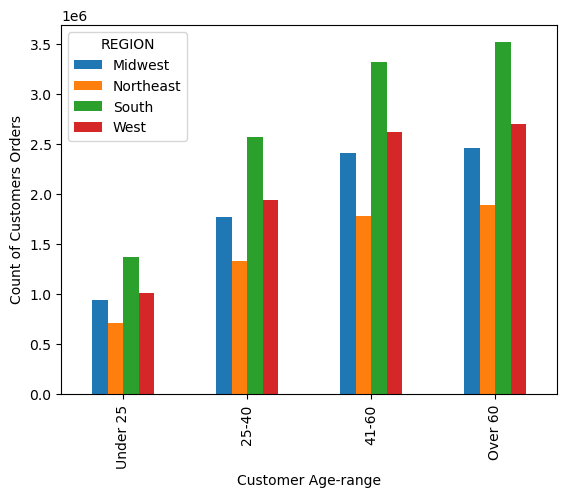

In [65]:
age_bar = df_5.groupby(['age_group', 'REGION'], observed=False).size().unstack().plot.bar()
plt.xlabel('Customer Age-range')
plt.ylabel('Count of Customers Orders')
plt.tight_layout

In [91]:
age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_orders_bar_region.png'), 
                         bbox_inches='tight')

Text(0, 0.5, 'Count of Purchase')

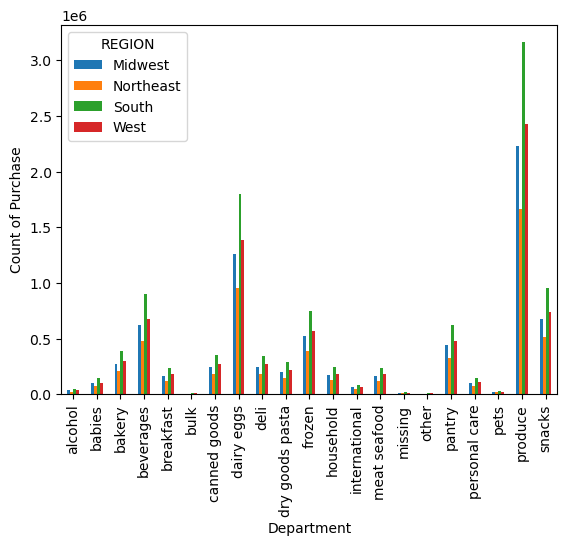

In [67]:
#all orders
df_5.groupby(['department', 'REGION'], observed=False).size().unstack().plot.bar()
plt.xlabel('Department')
plt.ylabel('Count of Purchase')

Text(0, 0.5, 'Count of Purchase')

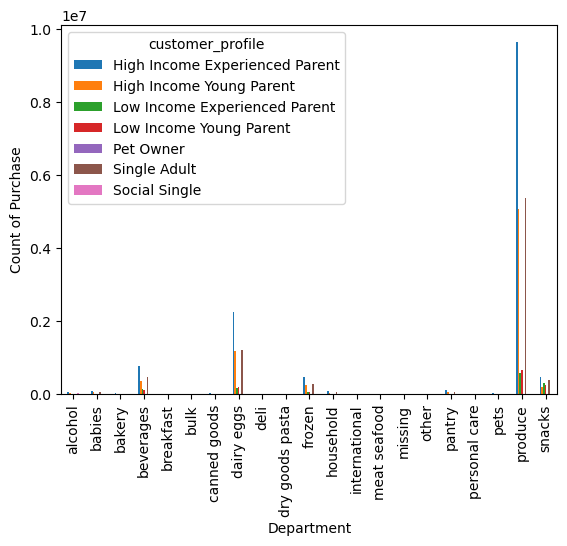

In [68]:
#All orders with all products for top departments for each customer
df_5.groupby(['top_department', 'customer_profile'], observed=False).size().unstack().plot.bar()
plt.xlabel('Department')
plt.ylabel('Count of Purchase')

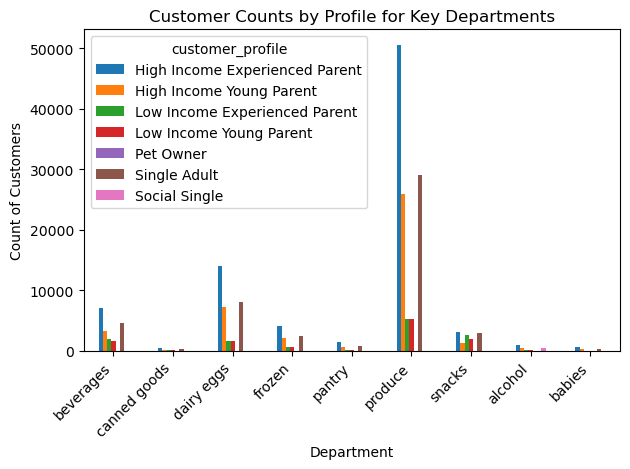

In [69]:
#unique users
df_5_uniq_user.groupby(['top_department', 'customer_profile']) \
      .size() \
      .unstack(fill_value=0) \
      .reindex(keep_depts) \
      .plot(kind='bar')

plt.xlabel('Department')
plt.ylabel('Count of Customers')
plt.title('Customer Counts by Profile for Key Departments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

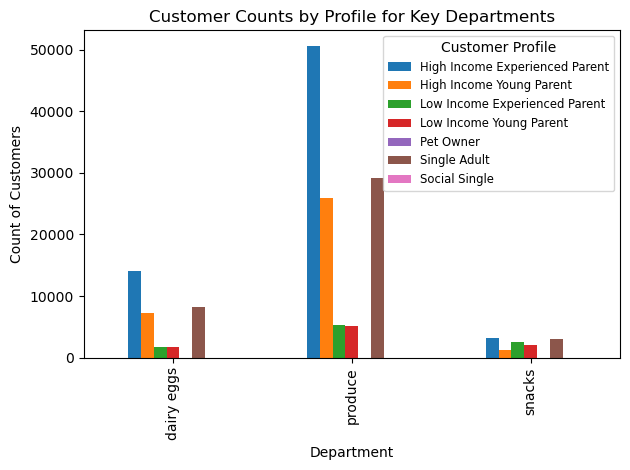

In [70]:
#unique customer id to make each point a customer, group by top department
bar_cust_top_prof = df_5_uniq_user.groupby(['top_department', 'customer_profile']) \
      .size() \
      .unstack(fill_value=0) \
      .reindex(keep_key_depts) \
      .plot(kind='bar')

plt.xlabel('Department')
plt.ylabel('Count of Customers')
plt.title('Customer Counts by Profile for Key Departments')
plt.legend(title = 'Customer Profile', loc = 'upper right', fontsize='small')
plt.tight_layout()


In [90]:
#Export data - low income spending more on snacks
bar_cust_top_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cust_top_prof_key.png'), 
                         bbox_inches='tight')

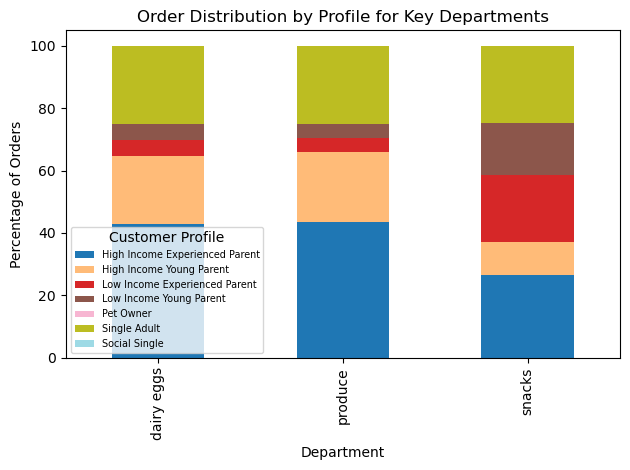

In [167]:
# 1. Count orders per (department × profile)
orders_count = (
    df_5_uniq_user
    .groupby(['top_department', 'customer_profile'])
    .size()
    .unstack(fill_value=0)
)

# 2. Turn counts into row‐wise percentages
orders_pct = orders_count.div(orders_count.sum(axis=1), axis=0) * 100

# 3. Reindex to keep only your key departments, then plot
bar_cust_top_perc = orders_pct\
    .reindex(keep_key_depts)\
    .plot(kind='bar', stacked=True, colormap='tab20')

plt.xlabel('Department')
plt.ylabel('Percentage of Orders')
plt.title('Order Distribution by Profile for Key Departments')
plt.legend(title='Customer Profile', loc='lower left', fontsize='x-small')
plt.tight_layout()

In [169]:
bar_cust_top_perc.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cust_top_perc.png'), bbox_inches = 'tight')

In [72]:
df_instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,department,prices,merge_indicator,price-range-loc,Busiest day,Busiest days,busiest_period_of_day.,max_order,loyalty_flag,mean_spent,spender_flag,median_days_s_p_o,buyer_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,merged_customer,REGION,activity_flag,age_group,income_band,dep_group,top_department,customer_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,beverages,9.0,both,Mid-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,25-40,Low Income,Many Dependents,dairy eggs,Low Income Young Parent
1,2539329,1,1,2,8,NaN,True,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91,16,dairy eggs,12.5,both,Mid-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,25-40,Low Income,Many Dependents,dairy eggs,Low Income Young Parent
2,2539329,1,1,2,8,NaN,True,12427,3,0,both,Original Beef Jerky,23,19,snacks,4.4,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,25-40,Low Income,Many Dependents,dairy eggs,Low Income Young Parent
3,2539329,1,1,2,8,NaN,True,26088,4,0,both,Aged White Cheddar Popcorn,23,19,snacks,4.7,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,25-40,Low Income,Many Dependents,dairy eggs,Low Income Young Parent
4,2539329,1,1,2,8,NaN,True,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54,17,household,1.0,both,Low-range product,Busiest days,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,25-40,Low Income,Many Dependents,dairy eggs,Low Income Young Parent


In [76]:
df_max_order = (
    df_instacart.sort_values(by=['user_id', 'max_order'], ascending=[True, False])
    .drop_duplicates(subset='user_id', keep='first')
    .reset_index(drop=True))
df_max_order

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,department,prices,merge_indicator,price-range-loc,Busiest day,Busiest days,busiest_period_of_day.,max_order,loyalty_flag,mean_spent,spender_flag,median_days_s_p_o,buyer_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,merged_customer,REGION,activity_flag,age_group,income_band,dep_group,top_department,customer_profile
0,2919277,1,1,0,12,NaN,True,39475,1,0,both,Total Greek Strained Yogurt,120,16,dairy eggs,4.9,both,Low-range product,Busiest days,Busiest days,Most Orders,16,Regular customer,6.323077,Low spender,8.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity,25-40,Low Income,Many Dependents,dairy eggs,Low Income Young Parent
1,2168274,2,1,2,11,NaN,True,32792,1,0,both,Chipotle Beef & Pork Realstick,23,19,snacks,5.2,both,Mid-range product,Busiest days,Regularly busy,Most Orders,14,Regular customer,7.515897,Low spender,13.0,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,both,West,High Activity,Over 60,High Income,Many Dependents,dairy eggs,High Income Experienced Parent
2,1374495,3,1,1,14,NaN,True,9387,1,0,both,Granny Smith Apples,24,4,produce,8.8,both,Mid-range product,Busiest days,Busiest days,Most Orders,12,Regular customer,8.197727,Low spender,10.0,Frequent customer,Female,Arizona,33,7/28/2017,3,married,93240,both,West,High Activity,25-40,High Income,Many Dependents,produce,High Income Young Parent
3,3343014,4,1,6,11,NaN,True,36606,1,0,both,Sprouted Multi-Grain Bread,112,3,bakery,9.4,both,Mid-range product,Busiest days,Regularly busy,Most Orders,5,New customer,8.205556,Low spender,20.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,High Activity,25-40,Low Income,Many Dependents,beverages,Low Income Young Parent
4,2717275,5,1,3,12,NaN,True,15349,1,0,both,Organic Raw Agave Nectar,29,13,pantry,10.7,both,Mid-range product,Busiest days,Slowest days,Most Orders,4,New customer,9.189189,Low spender,11.0,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,both,West,Low Activity,Over 60,High Income,No Dependents,produce,Single Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206202,969311,206205,1,4,12,NaN,True,27845,1,0,both,Organic Whole Milk,84,16,dairy eggs,12.8,both,Mid-range product,Busiest days,Slowest days,Most Orders,3,New customer,8.909375,Low spender,30.0,Non-frequent customer,Female,Hawaii,38,9/8/2019,2,married,99402,both,West,Low Activity,25-40,High Income,Few Dependents,dairy eggs,High Income Young Parent
206203,3189322,206206,1,3,18,NaN,True,13817,1,0,both,"\""Im Pei-nut Butter\"" Double Chocolate Cookie ...",37,1,frozen,10.8,both,Mid-range product,Busiest days,Slowest days,Average Orders,67,Loyal customer,7.646667,Low spender,3.0,Frequent customer,Female,Idaho,25,2/11/2018,2,married,75041,both,West,High Activity,Under 25,High Income,Few Dependents,frozen,High Income Young Parent
206204,2166133,206207,1,6,19,NaN,True,47766,1,0,both,Organic Avocado,24,4,produce,6.3,both,Mid-range product,Busiest days,Regularly busy,Average Orders,16,Regular customer,7.313453,Low spender,16.0,Regular customer,Male,Illinois,76,3/31/2018,1,married,110135,both,Midwest,High Activity,Over 60,High Income,Few Dependents,dairy eggs,High Income Experienced Parent
206205,2227043,206208,1,1,15,NaN,True,34213,1,0,both,Great White Bread,112,3,bakery,12.7,both,Mid-range product,Busiest days,Busiest days,Most Orders,49,Loyal customer,8.366617,Low spender,7.0,Frequent customer,Male,Indiana,64,11/23/2019,1,married,156838,both,Midwest,High Activity,Over 60,High Income,Few Dependents,produce,High Income Experienced Parent


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

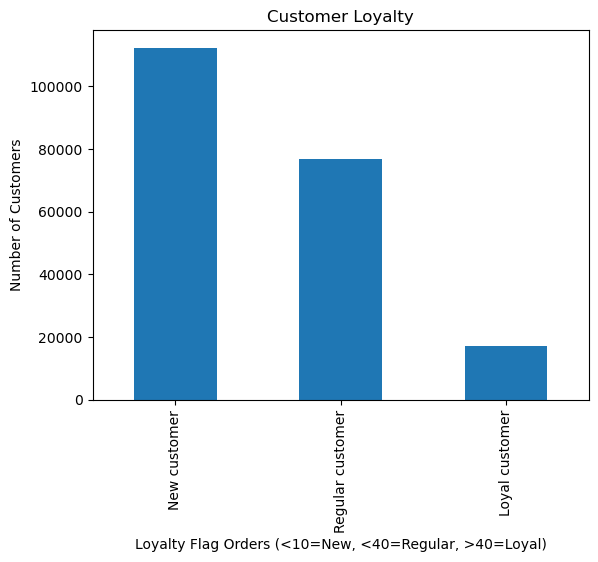

In [84]:
bar_loyal = df_max_order['loyalty_flag'].value_counts().plot.bar()
plt.xlabel('Loyalty Flag Orders (<10=New, <40=Regular, >40=Loyal)')
plt.ylabel('Number of Customers')
plt.title('Customer Loyalty')
plt.tight_layout

In [89]:
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyal.png'), 
                         bbox_inches='tight')

Text(0, 0.5, 'Number of Customers')

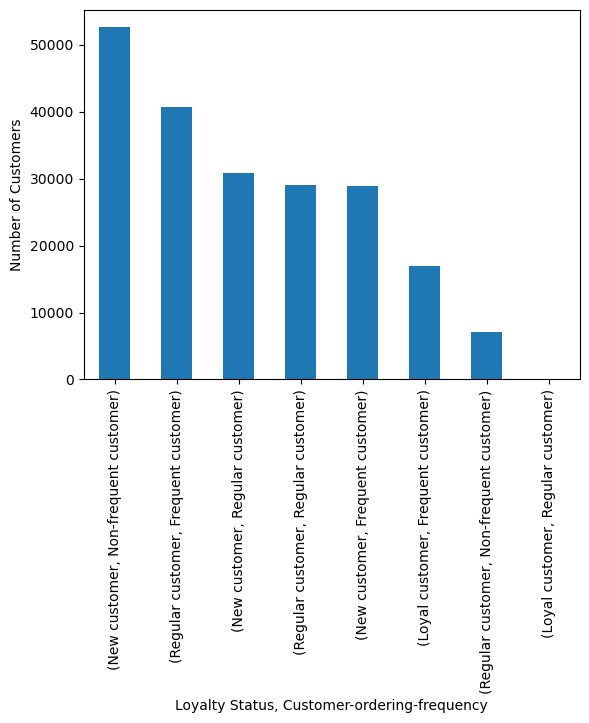

In [130]:
df_max_order.groupby('loyalty_flag')['buyer_flag'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Loyalty Status, Customer-ordering-frequency')
plt.ylabel('Number of Customers')

Text(0.5, 1.0, 'Loyal Customer - Buying Frequency')

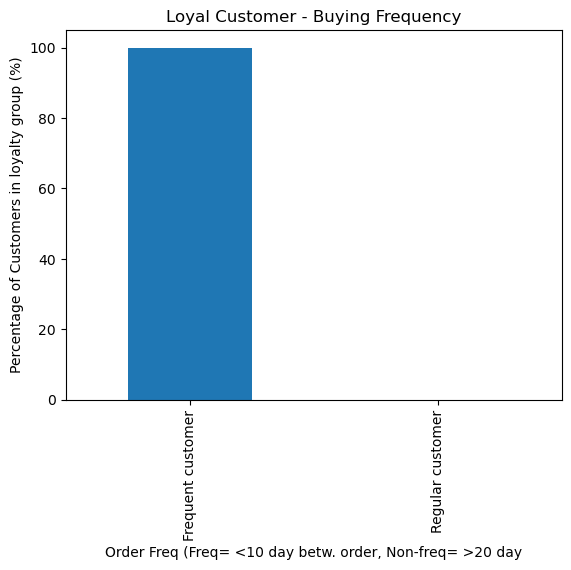

In [149]:
counts_loyal = df_max_order.groupby('loyalty_flag').get_group('Loyal customer')['buyer_flag'].value_counts(normalize=True) * 100

count_loyal_bar = counts_loyal.sort_values(ascending=False).plot.bar()
plt.xlabel('Order Freq (Freq= <10 day betw. order, Non-freq= >20 day')
plt.ylabel('Percentage of Customers in loyalty group (%)')
plt.title('Loyal Customer - Buying Frequency')

In [152]:
count_loyal_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_count_loyal_buyer.png'), bbox_inches = 'tight')

Text(0.5, 1.0, 'Regular Customer - Buying Frequency')

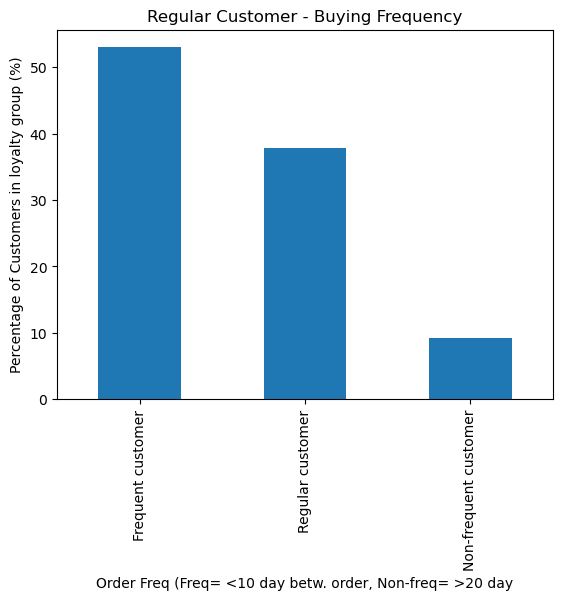

In [153]:
counts_reg = df_max_order.groupby('loyalty_flag').get_group('Regular customer')['buyer_flag'].value_counts(normalize=True) * 100

counts_reg_bar = counts_reg.sort_values(ascending=False).plot.bar()
plt.xlabel('Order Freq (Freq= <10 day betw. order, Non-freq= >20 day')
plt.ylabel('Percentage of Customers in loyalty group (%)')
plt.title('Regular Customer - Buying Frequency')

In [154]:
counts_reg_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_count_reg_buyer.png'), bbox_inches = 'tight')

Text(0.5, 1.0, 'New Customer - Buying Frequency')

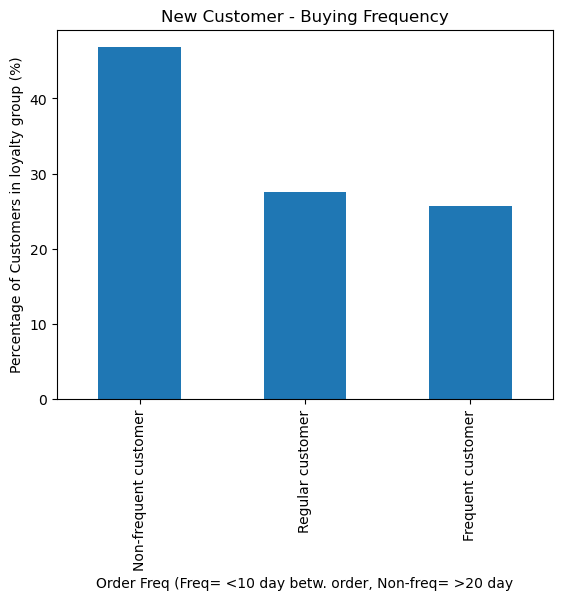

In [157]:
counts_new = df_max_order.groupby('loyalty_flag').get_group('New customer')['buyer_flag'].value_counts(normalize=True) * 100

counts_new_bar = counts_new.sort_values(ascending=False).plot.bar()
plt.xlabel('Order Freq (Freq= <10 day betw. order, Non-freq= >20 day')
plt.ylabel('Percentage of Customers in loyalty group (%)')
plt.title('New Customer - Buying Frequency')

In [158]:
counts_new_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_count_new_buyer.png'), bbox_inches = 'tight')